# Classify fakenews
Student project, Kari Lehtomaa , lehtomaa.kari@gmail.com

## Introduction
add some text here

In [1]:
# https://www.kaggle.com/jruvika/fake-news-detection
# https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#extracting-features-from-text-files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fakenews.csv",sep=",")
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


## Problem Formulation
Add some text

In [3]:
dataset = df[['Headline','Body', 'Label']]

In [4]:
dataset.groupby('Label').describe()

Headline                                                                 \
         count unique                                                top freq   
Label                                                                           
0         2137   1226                       Ravens @ Raiders - Wednesday    6   
1         1872   1605  World Cup 2018: Who needs what to qualify for ...    5   

       Body                                                                 
      count unique                                                top freq  
Label                                                                       
0      2120   1193  A Potato Battery Can Light up a Room for Over ...  143  
1      1868   1670  Chat with us in Facebook Messenger. Find out w...   61

## Method
Add some text

In [5]:
# for extracting features
from sklearn.feature_extraction.text import CountVectorizer
import string

In [6]:
dataset['text'] = dataset['Headline'] + " " + dataset['Body']
dataset = dataset.drop(['Headline', 'Body'], axis=1)

In [7]:
def removeNotNeededChars(mess):
    mess = str(mess)
    mess = mess.replace("\n"," ")
    xx = [x for x in mess if x not in string.punctuation]
    xx = ''.join(xx)
    return xx

In [8]:
dataset['text'] = dataset['text'].apply(removeNotNeededChars)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['text'], dataset['Label'], test_size=0.3, random_state=1)

In [12]:
countsv = CountVectorizer()
X_traincv = countsv.fit_transform(X_train)
X_testcv = countsv.transform(X_test)

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

In [14]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_traincv)
X_test_tfidf = tfidf_transformer.transform(X_testcv)

In [15]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [16]:
bayes_predy = clf.predict(X_test_tfidf)

In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

mytestpl = Pipeline([
('cv', CountVectorizer()),
('tfidf', TfidfTransformer()),
('cgf', SGDClassifier(loss='hinge', alpha=1e-3, random_state=42,max_iter=5, tol=None)),
])

In [18]:
mytestpl.fit(X_train, y_train)
sgd_predy = mytestpl.predict(X_test)

## Results
Add some text

In [19]:
from sklearn import metrics

In [22]:
np.mean(bayes_predy == y_test)

0.9301745635910225

In [36]:
cm = metrics.confusion_matrix(y_test, bayes_predy)

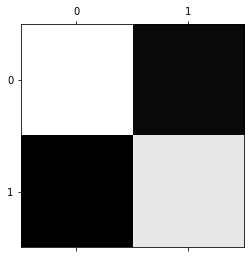

In [38]:
plt.matshow(cm,cmap=plt.cm.gray)

In [20]:
print(metrics.classification_report(y_test, bayes_predy))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       637
           1       0.91      0.94      0.93       566

    accuracy                           0.93      1203
   macro avg       0.93      0.93      0.93      1203
weighted avg       0.93      0.93      0.93      1203



In [21]:
print(metrics.classification_report(y_test, sgd_predy))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       637
           1       0.97      0.97      0.97       566

    accuracy                           0.97      1203
   macro avg       0.97      0.97      0.97      1203
weighted avg       0.97      0.97      0.97      1203



In [ ]:
# Drop below code...

In [30]:
# Parameter tuning
from sklearn.model_selection import GridSearchCV
parameters = {
'cv__ngram_range': [(1, 1), (1, 2)],
'tfidf__use_idf': (True, False),
'cgf__alpha': (1e-2, 1e-3),
}

In [31]:
gs_cgf = GridSearchCV(mytestpl, parameters, cv=5, n_jobs=-1)

In [32]:
gs_cgf = gs_cgf.fit(X_train, y_train)

In [33]:
gs_cgf.best_params_

{'cgf__alpha': 0.001, 'cv__ngram_range': (1, 2), 'tfidf__use_idf': True}

In [34]:
sgd_gs_predy = gs_cgf.predict(X_test)

In [35]:
print(metrics.classification_report(y_test, sgd_gs_predy))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       637
           1       0.96      0.98      0.97       566

    accuracy                           0.97      1203
   macro avg       0.97      0.97      0.97      1203
weighted avg       0.97      0.97      0.97      1203



## Conclusion